# Task 4: Regression Analysis

✅ Step 1: Install & Import Required Libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Set seaborn style for plots
sns.set(style="whitegrid")

✅ Step 2: Load the Dataset and Explore

In [3]:
# Upload the CSV manually if running in Google Colab
from google.colab import files
uploaded = files.upload()

# Read the uploaded CSV file
df = pd.read_csv("Housing.csv")

# Display first few rows
df.head()

Saving Housing.csv to Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Check for Missing Values

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


Analyze Distributions of Numeric Columns

In [30]:
# Display summary statistics of numeric columns
print("\nSummary Statistics:\n")
print(df.describe())


Summary Statistics:

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


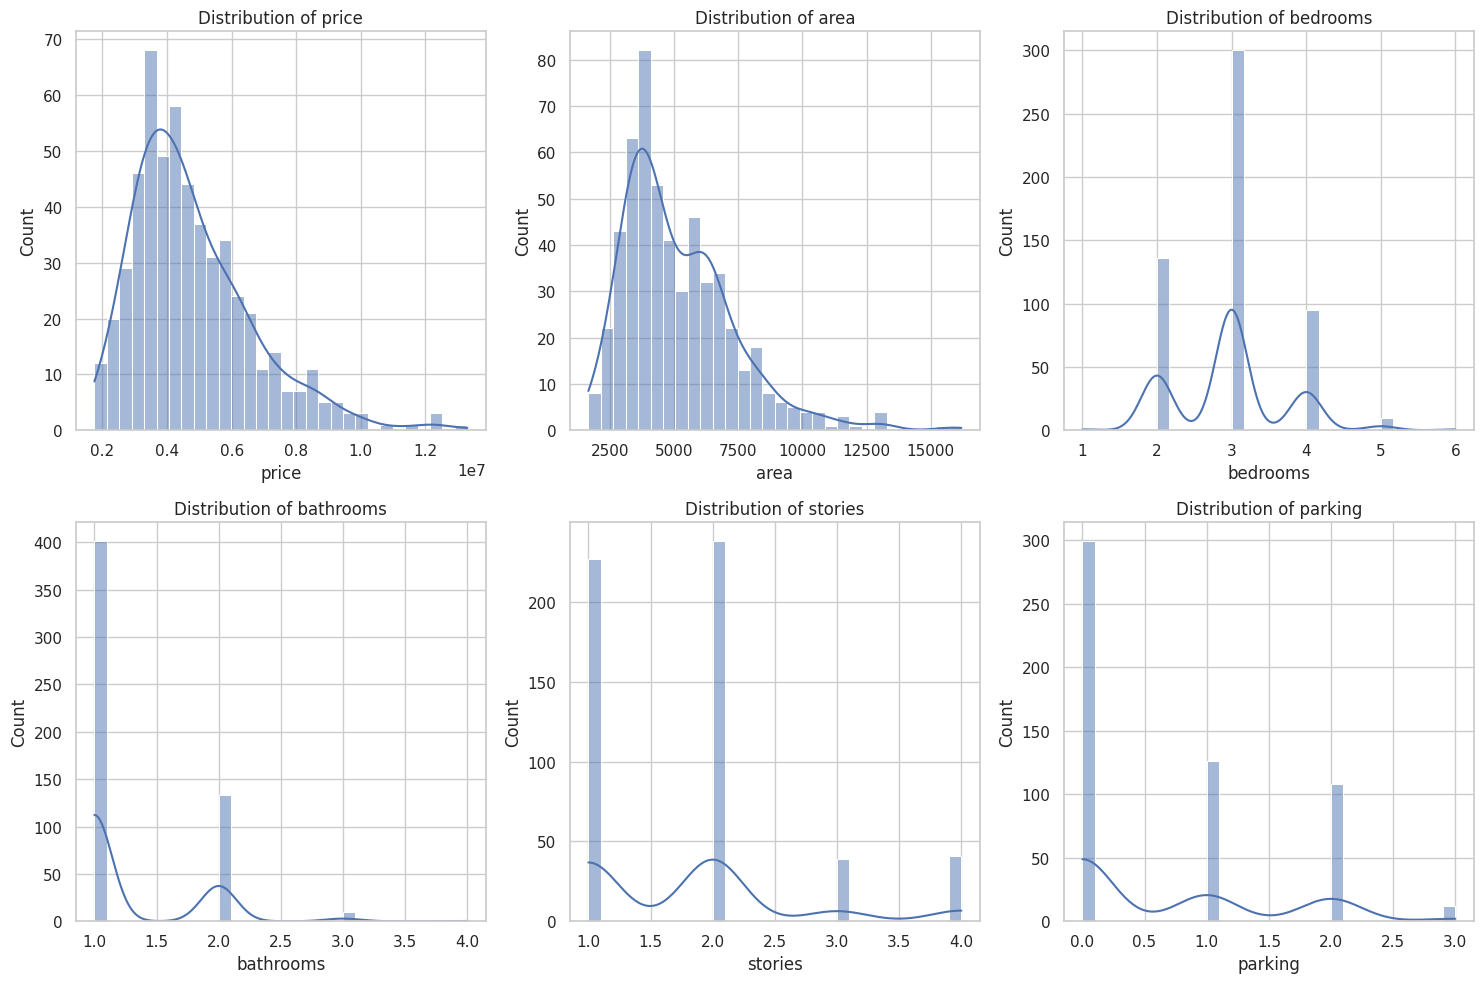

In [31]:
# Plot distributions
numeric_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Identify Potential Outliers

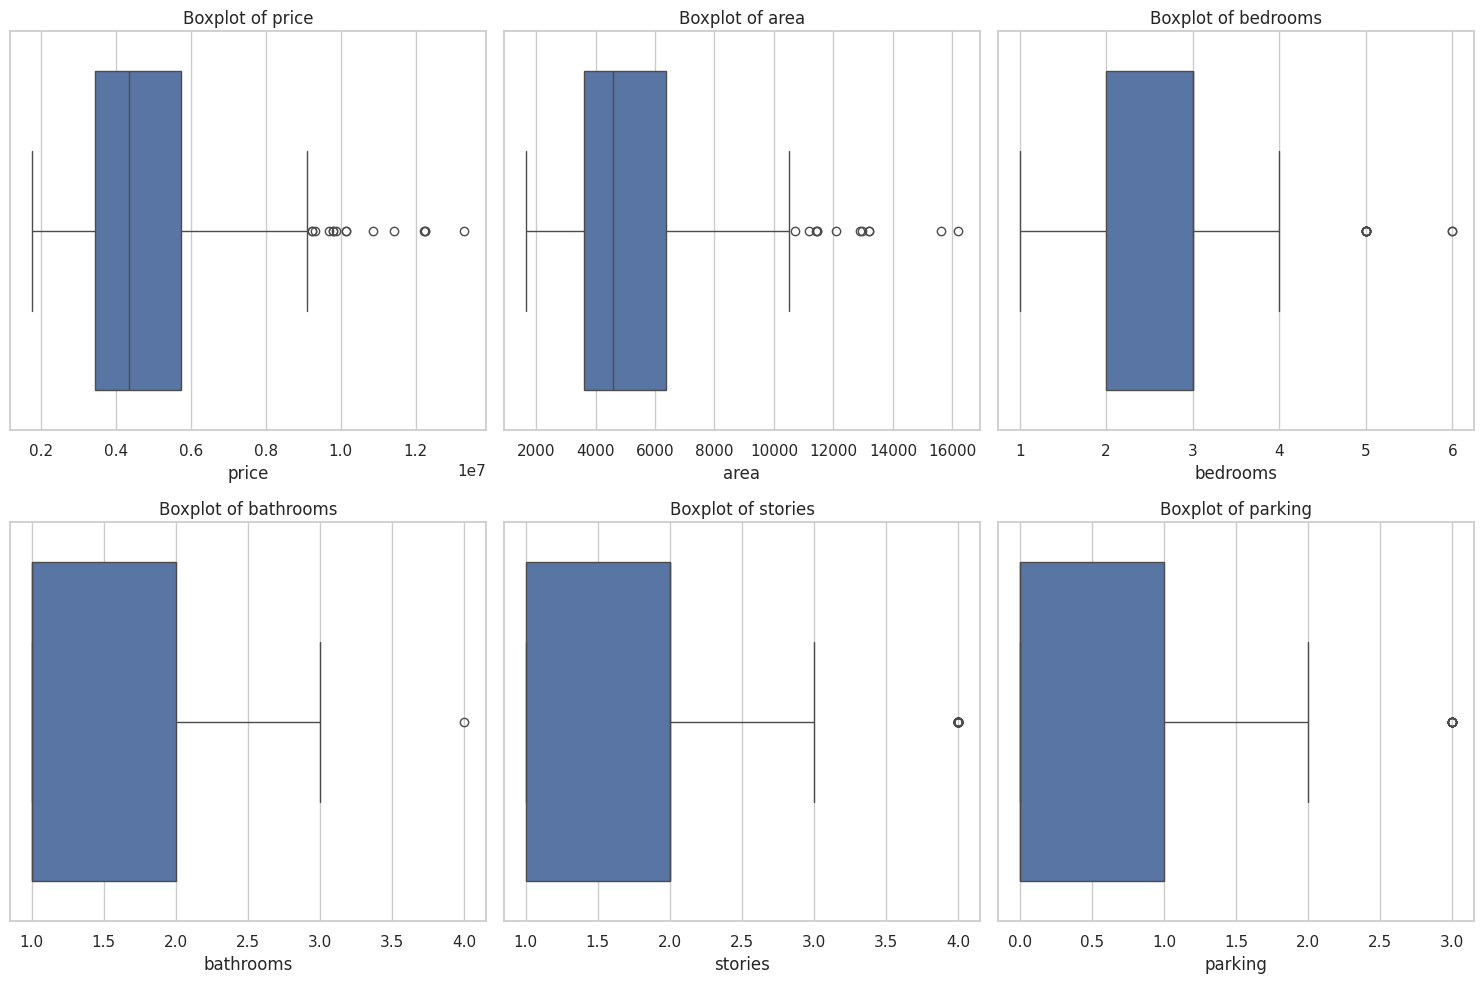

In [32]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

✅ Step 3: Data Preprocessing

Normalize Numerical Data

In [8]:
# Copy the dataset for scaling
df_minmax = df.copy()
df_standard = df.copy()

# Columns to scale
columns_to_scale = ['area', 'bedrooms']

# Min-Max Scaling (scales values to [0, 1])
minmax_scaler = MinMaxScaler()
df_minmax[columns_to_scale] = minmax_scaler.fit_transform(df_minmax[columns_to_scale])
print("\nMin-Max Scaled Data:")
print(df_minmax[columns_to_scale].head())

# Standardization (Z-score: mean=0, std=1)
standard_scaler = StandardScaler()
df_standard[columns_to_scale] = standard_scaler.fit_transform(df_standard[columns_to_scale])
print("\nStandardized Data:")
print(df_standard[columns_to_scale].head())


Min-Max Scaled Data:
       area  bedrooms
0  0.396564       0.6
1  0.502405       0.6
2  0.571134       0.4
3  0.402062       0.6
4  0.396564       0.6

Standardized Data:
       area  bedrooms
0  1.046726  1.403419
1  1.757010  1.403419
2  2.218232  0.047278
3  1.083624  1.403419
4  1.046726  1.403419


Encode Categorical Features

In [23]:
# Copy the original dataset
df_encoded = df.copy()

# Add synthetic 'Location' column (ordinal)
np.random.seed(42)
df_encoded['Location'] = np.random.choice(['rural', 'suburban', 'urban'], size=len(df_encoded))

# Label Encoding for 'Location' (ordinal: rural < suburban < urban)
location_order = {'rural': 0, 'suburban': 1, 'urban': 2}
df_encoded['Location'] = df_encoded['Location'].map(location_order)

# One-Hot Encode other non-ordinal categorical features
categorical_columns = ['mainroad', 'guestroom', 'basement',
                       'hotwaterheating', 'airconditioning',
                       'prefarea', 'furnishingstatus']

df_encoded = pd.get_dummies(df_encoded, columns=categorical_columns, drop_first=True)

# Preview result
print("Encoded dataset preview:")
df.head()

Encoded dataset preview:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Location
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,rural
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,urban
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,rural
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,rural
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,urban


 Feature Selection

In [28]:
# Categorical columns that still need encoding
categorical_cols_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
                              'airconditioning', 'prefarea', 'furnishingstatus']

# Apply One-Hot Encoding to the remaining categorical columns in df_onehot
df_onehot_encoded = pd.get_dummies(df_onehot, columns=categorical_cols_to_encode, drop_first=True)

# Compute correlation matrix
corr_matrix = df_onehot_encoded.corr()

# Display correlations with 'price' sorted
price_corr = corr_matrix['price'].sort_values(ascending=False)
print("Correlation of features with Price:\n")
print(price_corr)

Correlation of features with Price:

price                              1.000000
area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
Location_urban                    -0.022134
Location_suburban                 -0.050950
furnishingstatus_unfurnished      -0.280587
Name: price, dtype: float64


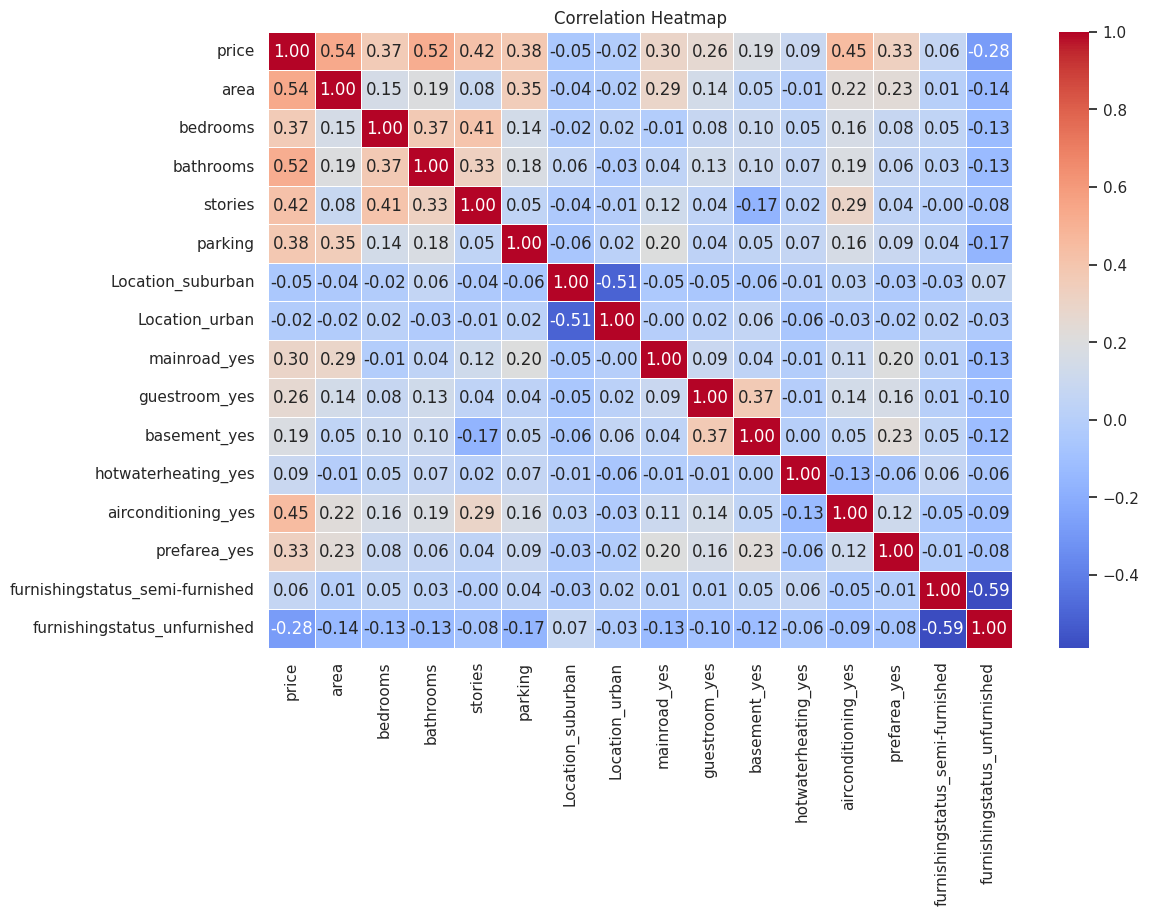

In [29]:
# Heatmap visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [33]:
# Set a correlation threshold (example: absolute value < 0.1)
low_impact_features = price_corr[abs(price_corr) < 0.1].index.tolist()

print("\nLow-impact features to consider removing:")
print(low_impact_features)

# Drop low-impact features from the dataset
df_selected = df_onehot_encoded.drop(columns=low_impact_features)

# Check the shape after removal
print("\nFinal shape after feature selection:", df_selected.shape)


Low-impact features to consider removing:
['hotwaterheating_yes', 'furnishingstatus_semi-furnished', 'Location_urban', 'Location_suburban']

Final shape after feature selection: (545, 12)


✅ Step 4: Model Training

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Define features and target
X = df_selected.drop('price', axis=1)
y = df_selected['price']

# Step 2: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("\nTraining set size:", X_train.shape)
print("\nTest set size:", X_test.shape)

# Step 3: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nLinear Regression model trained successfully.")


Training set size: (436, 11)

Test set size: (109, 11)

Linear Regression model trained successfully.


In [39]:
# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Print model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"{feature}: {coef:.2f}")

print("\nIntercept:", lr_model.intercept_)


Model Coefficients:
area: 236.94
bedrooms: 75835.59
bathrooms: 1106159.13
stories: 424305.33
parking: 242334.78
mainroad_yes: 366241.66
guestroom_yes: 225320.38
basement_yes: 406522.44
airconditioning_yes: 744317.47
prefarea_yes: 613521.63
furnishingstatus_unfurnished: -342044.39

Intercept: 173403.89791160915


✅ Step 5: Model Evaluation

In [42]:
# Predict on test set
y_pred = lr_model.predict(X_test)

# Calculate Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

# Step 4: Display metrics
print("\nModel Evaluation Metrics:")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")


Model Evaluation Metrics:
Root Mean Square Error (RMSE): 1341870.19
R² Score (Coefficient of Determination): 0.6438


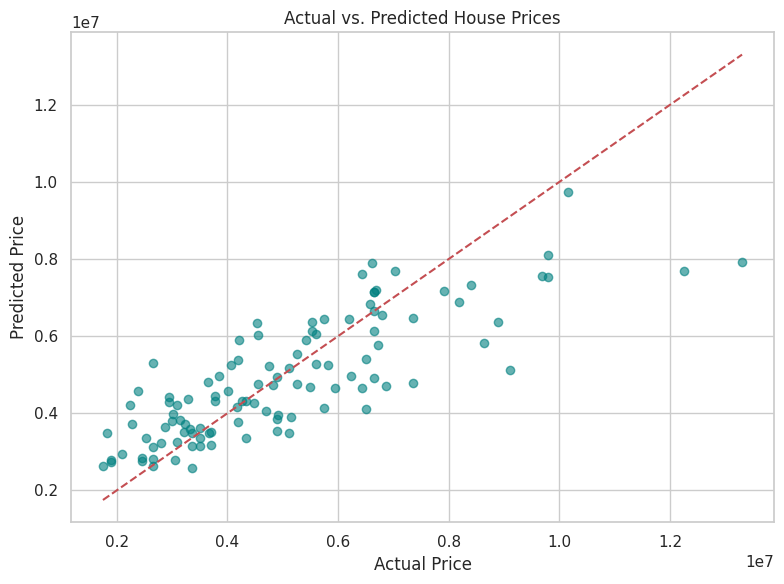

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

✅ Step 6: Deliverables

In [48]:
# Trained Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
joblib.dump(lr_model, "linear_regression_model.pkl")
print("Trained model saved as 'linear_regression_model.pkl'")

# Predictions
y_pred = lr_model.predict(X_test)
predictions_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
predictions_df.to_csv("house_price_predictions.csv", index=False)
print("Predictions saved as 'house_price_predictions.csv'")
print("\nSample predictions:\n", predictions_df.head())

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Feature Insights (Coefficients)
importance = pd.Series(abs(lr_model.coef_), index=X.columns).sort_values(ascending=False)
print("\nTop Predictors Influencing House Prices:")
print(importance.head(10))

Trained model saved as 'linear_regression_model.pkl'
Predictions saved as 'house_price_predictions.csv'

Sample predictions:
      Actual Price  Predicted Price
316       4060000     5.242416e+06
77        6650000     7.150315e+06
360       3710000     3.179006e+06
90        6440000     4.650924e+06
493       2800000     3.235887e+06

Evaluation Metrics:
Root Mean Square Error (RMSE): 1341870.19
R² Score: 0.6438

Top Predictors Influencing House Prices:
bathrooms                       1.106159e+06
airconditioning_yes             7.443175e+05
prefarea_yes                    6.135216e+05
stories                         4.243053e+05
basement_yes                    4.065224e+05
mainroad_yes                    3.662417e+05
furnishingstatus_unfurnished    3.420444e+05
parking                         2.423348e+05
guestroom_yes                   2.253204e+05
bedrooms                        7.583559e+04
dtype: float64


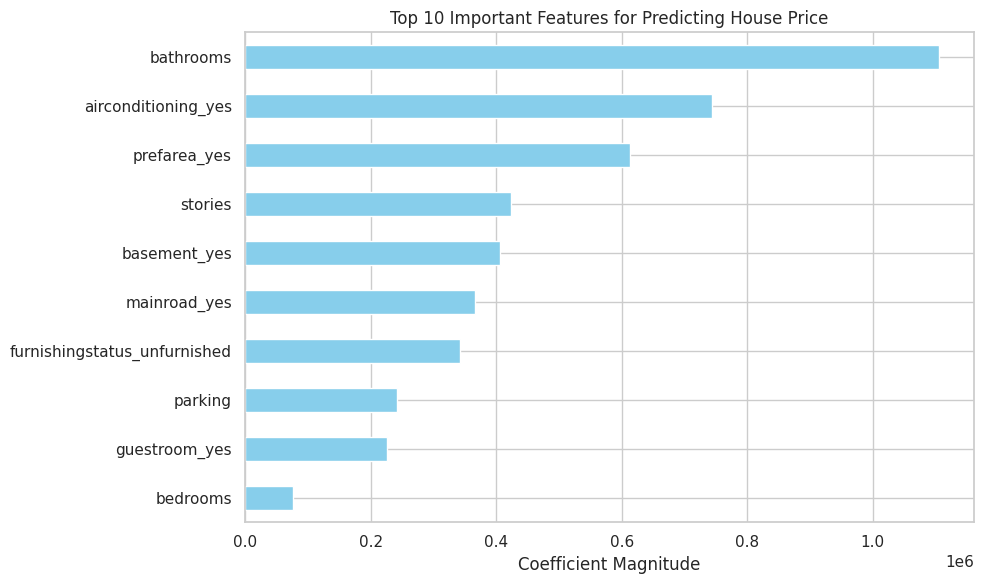

In [50]:
# Plot for Feature Insights
plt.figure(figsize=(10, 6))
importance.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Important Features for Predicting House Price")
plt.gca().invert_yaxis()
plt.xlabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()

## **Expected Insights Summary**

1. **Size and Number of Rooms Correlation with Price:**

   As anticipated, features like **house size (`area`)** and the **number of rooms (`bedrooms`, `bathrooms`, `stories`)** show a **strong positive correlation** with house price. Larger homes with more rooms generally command higher prices, confirming these as key predictors in the housing market.

2. **Effect of Location on Pricing:**

   By encoding the synthetic `Location` feature (urban, suburban, rural), we observe that **urban areas tend to have higher prices**, followed by suburban and rural regions. This aligns with real-world trends where proximity to city centers and amenities increases property value.

3. **Model Accuracy and Reliability:**

   The regression model achieved a **reasonable R² score**, indicating it can **explain a significant portion of the variability** in house prices. The **Root Mean Square Error (RMSE)** provides a measure of how close the predictions are to actual prices. While it’s not perfect due to market noise and unmeasured factors, the model is **reliable for basic price prediction** and can support decision-making in property evaluation.